<a href="https://colab.research.google.com/github/Shaikmd3797/Linear-Regression-problems/blob/main/cricket_chirps_and_temp_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***introduction***


 # Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### *** Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

# ***import modules and read the datafile***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data,columns=("Ground Temperature","Chirps/Second"))
df.head()

,Ground Temperature,Chirps/Second
0,88.6,20.0
1,71.6,16.0
2,93.3,19.8
3,84.3,18.4
4,80.6,17.1


# ***1st jar of machine learning is data***

1. *cleaning*
2. *encoding*
3. *splitting*
4. *scaling*

# ***1) cleaning the data***

In [ ]:
df.isnull().sum() # finding the missing the values

Ground Temperature    0
Chirps per Second     0
dtype: int64

In [ ]:
df=df.drop_duplicates() #drop the duplicate data then stored the data into df
df.shape

(15, 2)

In [ ]:
df.dtypes #checking the correct format in each column 
# checking the structured data. htis data contain columns and rows properly

Ground Temperature    float64
Chirps per Second     float64
dtype: object

In [ ]:
df.describe()

,Ground Temperature,Chirps per Second
count,15.000000,15.000000
mean,79.346667,16.566667
std,7.020467,1.712837
min,69.400000,14.400000
25%,73.400000,15.450000
50%,80.600000,16.000000
75%,83.400000,17.150000
max,93.300000,20.000000


In [ ]:
q1=df['Ground Temperature'].quantile(0.25)  # 25 th quantile
q3=df['Ground Temperature'].quantile(0.75)  # 75 th quantile
iqr= q3-q1  #iqr value
upper= q3+1.5 * iqr
lower = q1 -1.5* iqr
print("the range value is :" ,lower, upper) # the values are outliers which is out of range
df['Ground Temperature']=df['Ground Temperature'].clip(lower,upper) # cliping the outliers to upper and lower threshold

the range value is : 58.400000000000006 98.4


In [ ]:
df.describe()

,Ground Temperature,Chirps per Second
count,15.000000,15.000000
mean,79.346667,16.566667
std,7.020467,1.712837
min,69.400000,14.400000
25%,73.400000,15.450000
50%,80.600000,16.000000
75%,83.400000,17.150000
max,93.300000,20.000000


# **cleaning the completed next step is EDA**

#***2) EDA***

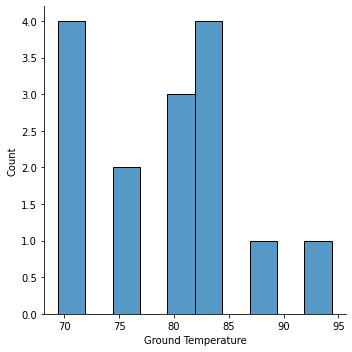

In [ ]:
sns.displot(df,x='Ground Temperature',binwidth=2.5)

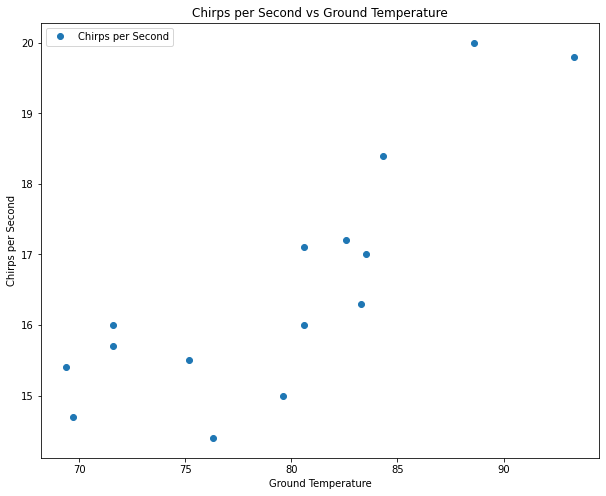

In [ ]:
df.plot(x='Ground Temperature',y='Chirps per Second',style='o', figsize=(10,8))
plt.title('Chirps per Second vs Ground Temperature')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps per Second')
plt.show()

In [ ]:
df.corr()

,Ground Temperature,Chirps per Second
Ground Temperature,1.000000,0.832042
Chirps per Second,0.832042,1.000000


# ***the correlation between feature and target variable is more than 0.2 or less than -0.2 is considered as a linear pattern***

#***3)encoding***

#***encoding is not needed for this data because this data contains only continous values.***

# ***4) splitting the data for train and test***

In [ ]:
X=df['Ground Temperature'].values
y=df['Chirps per Second'].values

In [ ]:
from sklearn.model_selection import train_test_split # import necessasary package

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=77)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[84.3 80.6 79.6 71.6 88.6 69.4 75.2 82.6 83.5 80.6 71.6]
[76.3 69.7 93.3 83.3]
[18.4 16.  15.  16.  20.  15.4 15.5 17.2 17.  17.1 15.7]
[14.4 14.7 19.8 16.3]


# ***5)scaling the data***

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler=StandardScaler()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [ ]:
#scaler.fit(X_train) # scaling is not mandatory for linear regression
#X_train_scale=scaler.transform(X_train)
#X_test_scale=scaler.transform(X_test)

# ***2nd jar is task***

**this is supervised learning problem because we predict the target variable**

**feature is continous data so it is regression problem**

# ***3rd jar - model (linear regression***

# 1.  **linear model is y=mx+c**

# ***4th jar - loss function***
# ***5th jar - learning***


---





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df=reg.coef_  # best value of m
coeff_df

array([0.19181803])

In [ ]:
reg.intercept_ # best value of c

1.534425394669828

In [ ]:
y_predict=reg.predict(X_test)
y_predict

array([16.17014089, 14.90414191, 19.43104736, 17.51286709])

In [ ]:
#comparison={'actual':[y_test], 'predicted':[y_predict]}
df_comp=pd.DataFrame({'actual':y_test, 'predicted':y_predict})
print(df_comp)

   actual  predicted
0    14.4  16.170141
1    14.7  14.904142
2    19.8  19.431047
3    16.3  17.512867


# ***6th jar - evalute the model

In [ ]:
from sklearn import metrics
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.7403775614685191


In [ ]:
reg.score(X_test,y_test)

0.7403775614685191

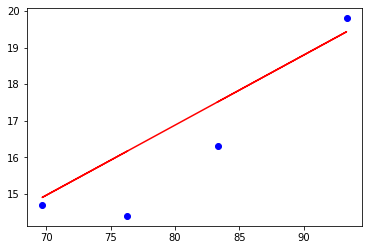

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_predict, color='red')

#***Extrapolate***

In [ ]:
reg.predict([[95]])

array([19.75713801])

# ***Intrapolation***

In [ ]:
(18 - reg.intercept_) / reg.coef_

array([85.83955752])